# Finance & Analytics Club

## ADX (Average Directional Index)

It is a way of measuring strength of a trend.

ADX is non directional meaning it makes no inference about the direction of the trend but only about the strength of the trend.

The calculation involves finding both positive and negative directional movement (by comparing successive highs and lows) and then calculating the smoothed average of the difference of these.

More at: https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp

Import necessary libraries

In [2]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Download historical data for required stocks

In [4]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(364),dt.date.today())
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,191.679993,188.380005,191.639999,191.240005,27862000.0,188.769211
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758
...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004


### Function to calculate True Range and Average True Range

In [5]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [6]:
df2 = ATR(ohlcv, 14)
df2 = df2.dropna()
df2

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2019-04-22,204.940002,202.339996,202.830002,204.529999,19439500.0,201.887497,3.713852,4.451127
2019-04-23,207.750000,203.899994,204.429993,207.479996,23323000.0,204.799362,5.862503,4.463392
2019-04-24,208.479996,207.050003,207.360001,207.160004,17540600.0,204.483505,3.680634,4.370101
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808,3.276489,4.351001
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461,2.880005,4.275407
...,...,...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995,16.630005,19.972142
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005,23.320007,20.632143
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004,13.949997,20.819287


### Function to calculate Average Direction Index

#### I would strongly urge you to go through any youtube video on ADX calculation through excel to get a clear indication about what we are about to do on the following code.

In [7]:
def ADX(DF,n):
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus']) # Directional Movement Up
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus']) # Directional Movement Down
    TRn = []                 # To smooth the True Range
    DMplusN = []             # To smooth upward Directional Movement
    DMminusN = []            # To smooth downward Directional Movement
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2

In [9]:
df2 = ADX(df2, 14)
df2 = df2.dropna()
df2

,High,Low,Open,Close,Volume,Adj Close,TR,ATR,DMplus,DMminus,TRn,DMplusN,DMminusN,DIplusN,DIminusN,DIdiff,DIsum,DX,ADX
Date,,,,,,,,,,,,,,,,,,,
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.674149,3.467468,5.143754,0.000000,0.000000,70.800193,11.330561,27.604849,16.003574,38.989794,22.986219,54.993368,41.798166,38.053519
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.473602,3.000000,4.923754,0.000000,1.679993,68.743036,10.521236,27.313067,15.305166,39.732122,24.426956,55.037287,44.382558,38.505594
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.719727,7.649994,4.575042,0.000000,4.720001,71.482813,9.769719,30.082135,13.667228,42.083031,28.415804,55.750259,50.969815,39.395895
2019-06-04,179.830002,174.520004,175.440002,179.639999,30968000.0,178.001923,8.110275,4.749096,1.910004,0.000000,74.487173,10.981885,27.933411,14.743324,37.500968,22.757644,52.244292,43.560057,39.693335
2019-06-05,184.990005,181.139999,184.279999,182.539993,29773400.0,180.875458,6.988083,4.838960,5.160004,0.000000,76.154744,15.357469,25.938167,20.166135,34.059818,13.893683,54.225953,25.621832,38.688228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995,16.630005,19.972142,0.000000,15.389999,243.820816,26.561235,89.401596,10.893752,36.666925,25.773173,47.560677,54.190089,36.076996
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005,23.320007,20.632143,19.190002,0.000000,249.725051,43.854006,83.015768,17.560916,33.242868,15.681952,50.803783,30.867685,35.704902
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004,13.949997,20.819287,10.559998,0.000000,245.837544,51.281575,77.086070,20.859944,31.356508,10.496564,52.216453,20.102025,34.590411


/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


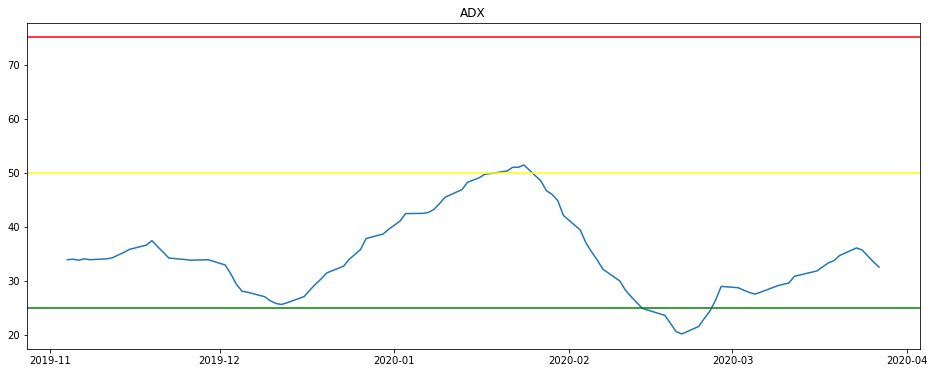

In [10]:
plt.figure(figsize = (16,6))
plt.plot(df2.iloc[-100:,-1])
plt.title('ADX')
plt.axhline(y=75, color = 'red')
plt.axhline(y=50, color = 'yellow')
plt.axhline(y=25, color = 'green')
plt.show()

#### ADX of 75-100 shows Extremely Strong Trend

#### ADX of 50-75 shows Very Strong Trend

#### ADX of 25-50 shows Strong Trend

#### ADX of 0-25 shows Weak Trend